In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


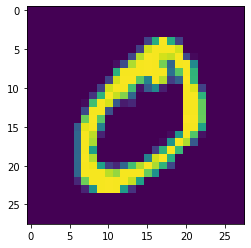

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#Exp 1 - change 32 in #24 to 16 - Got 99.47 accuracy, Changing learning rate to 0.002
#Exp 2 - #26-10, #24-5
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1), use_bias=False)) #26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu', use_bias=False)) #24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu', use_bias=False)) #24
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(8, 1, 1, activation='relu', use_bias=False)) #22

model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(16, 3, 3, activation='relu', use_bias=False))#9
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu', use_bias=False))#7
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(8, 3, 3, activation='relu', use_bias=False))#5
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(8, 3, 3, activation='relu', use_bias=False))#3
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(10, 4, 4, use_bias=False))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1..., use_bias=False)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 1), activation="relu", use_bias=False)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu"

ValueError: ignored

In [0]:
#consistent 99.41-47
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1), use_bias=False)) #26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu', use_bias=False)) #24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu', use_bias=False)) #22
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(8, 1, 1, activation='relu', use_bias=False)) #20

model.add(MaxPooling2D(pool_size=(2, 2)))#10

model.add(Convolution2D(16, 3, 3, activation='relu', use_bias=False))#8
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu', use_bias=False))#6
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(8, 3, 3, activation='relu', use_bias=False))#5
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(8, 3, 3, activation='relu', use_bias=False))#3
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(10, 3, 3, use_bias=False))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1..., use_bias=False)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", use_bias=False)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", use_bias=False)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 1), activation="relu", use_bias=False)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu"

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_139 (Conv2D)          (None, 26, 26, 16)        144       
_________________________________________________________________
batch_normalization_121 (Bat (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_121 (Dropout)        (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_140 (Conv2D)          (None, 24, 24, 32)        4608      
_________________________________________________________________
batch_normalization_122 (Bat (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_122 (Dropout)        (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_141 (Conv2D)          (None, 22, 22, 10)      

In [0]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1), use_bias=False)) #26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(24, 3, 3, activation='relu', use_bias=False)) #24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 3, 3, activation='relu', use_bias=False)) #22
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 1, 1, activation='relu', use_bias=False)) #20

model.add(MaxPooling2D(pool_size=(2, 2)))#10

model.add(Convolution2D(24, 3, 3, activation='relu', use_bias=False))#8
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(10, 3, 3, activation='relu', use_bias=False))#6
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(10, 3, 3, activation='relu', use_bias=False))#5
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(10, 3, 3, activation='relu', use_bias=False))#3
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(10, 3, 3, use_bias=False))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1..., use_bias=False)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), activation="relu", use_bias=False)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", use_bias=False)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1), activation="relu", use_bias=False)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), activation="relu

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_166 (Conv2D)          (None, 26, 26, 16)        144       
_________________________________________________________________
batch_normalization_145 (Bat (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_145 (Dropout)        (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_167 (Conv2D)          (None, 24, 24, 24)        3456      
_________________________________________________________________
batch_normalization_146 (Bat (None, 24, 24, 24)        96        
_________________________________________________________________
dropout_146 (Dropout)        (None, 24, 24, 24)        0         
_________________________________________________________________
conv2d_168 (Conv2D)          (None, 22, 22, 10)      

In [0]:
#from google.colab import drive
#drive.mount('/content/gdrive')


from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
def scheduler(epoch, lr):
  return round(lr * 1/(1 +  0.215 * epoch), 10) #0.319
checkpoint = ModelCheckpoint('/content/gdrive/My Drive/model-{epoch:03d}-{acc:03f}-{val_acc:03f}.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto')  

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

#model.fit(X_train, Y_train, batch_size=512, nb_epoch=10, verbose=1)
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1), checkpoint],)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 43s 716us/step - loss: 0.1242 - acc: 0.9490 - val_loss: 0.0374 - val_acc: 0.9885

Epoch 00001: val_loss improved from inf to 0.03737, saving model to /content/gdrive/My Drive/model-001-0.948967-0.988500.h5
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0024691358.
60000/60000 [==============================] - 14s 241us/step - loss: 0.1104 - acc: 0.9529 - val_loss: 0.0341 - val_acc: 0.9902

Epoch 00002: val_loss improved from 0.03737 to 0.03410, saving model to /content/gdrive/My Drive/model-002-0.952883-0.990200.h5
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0017266685.
60000/60000 [==============================] - 14s 238us/step - loss: 0.1034 - acc: 0.9555 - val_loss: 0.0216 - val_acc: 0.9927

Epoch 00003: val_loss improved from 0.03410 to 0.02157, savi

In [0]:
!ls "/content/gdrive/My Drive"


'02 Questionnaire - Gas Spring.gsheet'
 0.5xda50ivh4c.png
'AADHAR CARD.jpg'
 aadharpdf.pdf
 Abhijith_AUG_2016_Resume.doc
 Abhijith_AUG_2017_Resume.doc
 Abhijith_AUG_2017_Resume_v1.doc
 Abhijith_Bhat_Resume_Dec2018.docx
 Abhijith_Bhat_Resume_Dec2018.gdoc
 Abhijith_JULY_2016_Resume.doc
 Abhijith_JUNE_2016_Resume.doc
 Abhijith_Mar_2018_Resume.doc.gdoc
'Abhijith_MARCH_2013_Resume (1).doc'
 abhijith.PNG
'AI Glossary.gsheet'
 apo.html
 apo.pdf
 APO.pdf
 apo.png
 bajajdominar.pdf
 boschaccidentreport.pdf
'Colab Notebooks'
'Copy of TAGS v6.0ns.gsheet'
'D mail.gdoc'
 Documents
 dominar-400-manual.pdf
 download.pdf
 Educational
'Equations and Numpy usage:.gdoc'
 eStatement2197IN_2019-11-03_09:38.pdf
 Experiment
 FF.pdf
 GF.pdf
 IMG_20170310_151159.jpg
'Machine learning books pdf'
 MANLEO
 MBA
 model-001-0.952833-0.992400.h5
 model-002-0.955400-0.993000.h5
 modelsave
'Motomod Paddock stand (File responses)'
'Motomod Paddock stand.gform'
'Motomod Paddock stand (Responses).gsheet'
'new r1 .jpg'
 PA

In [0]:


#model.load_weights(filepath = "/content/gdrive/My Drive/model-002-0.955400-0.993000.h5")
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.018506120436755008, 0.9946]
